In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [32]:
# Files opening
path = "./data/"
trainingSetValues = pd.read_csv(path + "TrainingSetValues.csv", sep=",")
trainingSetLabels = pd.read_csv(path + "TrainingSetLabels.csv", sep=",")
testSetValues = pd.read_csv(path + "TestSetValues.csv", sep=",")


In [33]:
testSetValues.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [34]:
trainingSetLabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [35]:
# Converting columns in the good dtype
def changeDtypes(data):
    for column in data:
        if "date" in column:
                data[column] = pd.to_datetime(data[column], format="%Y/%m/%d")
        else:
            if data[column].dtype == "object":
                data[column] = pd.Categorical(data[column])

changeDtypes(trainingSetValues)
changeDtypes(testSetValues)


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


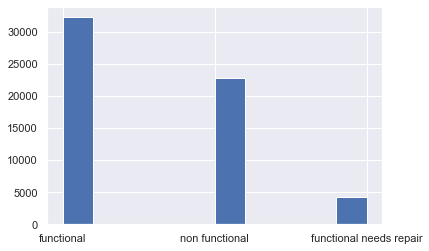

In [36]:
# Functional state
print(trainingSetLabels['status_group'].value_counts())
trainingSetLabels['status_group'].hist()
plt.show()

In [ ]:
# amount_tsh
print(trainingSetValues['amount_tsh'].value_counts())
print(trainingSetValues.shape[0])
# Delete amount_tsh from both data sets because of too many '0' values
trainingSetValues.drop(['amount_tsh'], axis = 1, inplace = True)
testSetValues.drop(['amount_tsh'], axis = 1, inplace = True)

In [45]:
print(trainingSetValues['date_recorded'].dt.year.value_counts())
print(testSetValues['date_recorded'].dt.year.value_counts())

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64
2011    7234
2013    5939
2012    1665
2004      11
2001       1
Name: date_recorded, dtype: int64


In [ ]:
# List number of NaN values in data

def get_nan_count(column):
    '''
    column - the column for which we want the NaN value count.
    This function returns the number of NaN values in a specific column.
    '''
    nan_count = column.isnull().sum()
    return nan_count

def list_nb_nan_columns(data):
    for column in data:
        nb = get_nan_count(data[column])
        if nb != 0:
            totalCol = data[column].count() + nb
            print(column,":", nb, "/", totalCol, "=", round(nb/totalCol *100 ,3), "%")
        
        
print("\nNaN data in trainingSetValues")
list_nb_nan_columns(trainingSetValues)
print("\nNaN data in testSetValues")
list_nb_nan_columns(testSetValues)
        

In [ ]:
# Deleting columns "wpt_name" and "num_private" because we think they are useless
del trainingSetValues["wpt_name"]
del trainingSetValues["num_private"]
del testSetValues["wpt_name"]
del testSetValues["num_private"]